In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv('ml_case_training_data.csv')
train_out=pd.read_csv('ml_case_training_output.csv')
train_hist=pd.read_csv('ml_case_training_hist_data.csv')

In [3]:
train_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [5]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign_disc_ele,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cons_12m,16096.0,194804.384630,679515.083441,-125276.000000,5906.250000,15332.500000,50221.500000,1.609711e+07
cons_gas_12m,16096.0,31911.636742,177588.456233,-3037.000000,0.000000,0.000000,0.000000,4.188440e+06
cons_last_month,16096.0,19461.536158,82356.756560,-91386.000000,0.000000,901.000000,4127.000000,4.538720e+06
forecast_base_bill_ele,3508.0,335.843857,649.406000,-364.940000,0.000000,162.955000,396.185000,1.256608e+04
forecast_base_bill_year,3508.0,335.843857,649.406000,-364.940000,0.000000,162.955000,396.185000,1.256608e+04
forecast_bill_12m,3508.0,3837.441866,5425.744327,-2503.480000,1158.175000,2187.230000,4246.555000,8.112263e+04
forecast_cons,3508.0,206.845165,455.634288,0.000000,0.000000,42.215000,228.117500,9.682890e+03
forecast_cons_12m,16096.0,2370.555949,4035.085664,-16689.260000,513.230000,1179.160000,2692.077500,1.038019e+05
forecast_cons_year,16096.0,1907.347229,5257.364759,-85627.000000,0.000000,378.000000,1994.250000,1.753750e+05


In [6]:
train_data.shape

(16096, 32)

In [7]:
(train_data.isnull().sum()/train_data.shape[0]*100).sort_values(ascending = False)

campaign_disc_ele           100.000000
forecast_bill_12m            78.205765
date_first_activ             78.205765
forecast_cons                78.205765
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
activity_new                 59.300447
channel_sales                26.205268
date_modif_prod               0.975398
forecast_price_pow_p1         0.782803
forecast_price_energy_p2      0.782803
forecast_price_energy_p1      0.782803
forecast_discount_energy      0.782803
origin_up                     0.540507
date_renewal                  0.248509
net_margin                    0.093191
margin_net_pow_ele            0.080765
margin_gross_pow_ele          0.080765
pow_max                       0.018638
date_end                      0.012425
imp_cons                      0.000000
nb_prod_act                   0.000000
num_years_antig               0.000000
id                            0.000000
has_gas                       0.000000
forecast_meter_rent_12m  

In [8]:
train_data["channel_sales"]

0        lmkebamcaaclubfxadlmueccxoimlema
1        foosdfpfkusacimwkcsosbicdxkicaua
2                                     NaN
3        foosdfpfkusacimwkcsosbicdxkicaua
4        lmkebamcaaclubfxadlmueccxoimlema
                       ...               
16091    foosdfpfkusacimwkcsosbicdxkicaua
16092    foosdfpfkusacimwkcsosbicdxkicaua
16093    foosdfpfkusacimwkcsosbicdxkicaua
16094    foosdfpfkusacimwkcsosbicdxkicaua
16095                                 NaN
Name: channel_sales, Length: 16096, dtype: object

In [9]:
train_data_copy = train_data.copy()

In [10]:
train_data_copy.drop(["campaign_disc_ele",
                        "forecast_bill_12m","date_first_activ","forecast_cons",
                        "forecast_base_bill_ele","forecast_base_bill_year","activity_new"],axis=1,inplace = True)

In [11]:
train_data_copy["channel_sales"]=train_data_copy["channel_sales"].fillna("new category")

In [12]:
train_data_copy.nunique()

id                          16096
channel_sales                   8
cons_12m                    12002
cons_gas_12m                 2290
cons_last_month              5308
date_activ                   1961
date_end                      371
date_modif_prod              2307
date_renewal                  398
forecast_cons_12m           15422
forecast_cons_year           4895
forecast_discount_energy       14
forecast_meter_rent_12m      3938
forecast_price_energy_p1      617
forecast_price_energy_p2      412
forecast_price_pow_p1          46
has_gas                         2
imp_cons                     8765
margin_gross_pow_ele         2979
margin_net_pow_ele           3006
nb_prod_act                    11
net_margin                  13189
num_years_antig                15
origin_up                       5
pow_max                       867
dtype: int64

In [13]:
train_data_copy.isnull().sum()

id                            0
channel_sales                 0
cons_12m                      0
cons_gas_12m                  0
cons_last_month               0
date_activ                    0
date_end                      2
date_modif_prod             157
date_renewal                 40
forecast_cons_12m             0
forecast_cons_year            0
forecast_discount_energy    126
forecast_meter_rent_12m       0
forecast_price_energy_p1    126
forecast_price_energy_p2    126
forecast_price_pow_p1       126
has_gas                       0
imp_cons                      0
margin_gross_pow_ele         13
margin_net_pow_ele           13
nb_prod_act                   0
net_margin                   15
num_years_antig               0
origin_up                    87
pow_max                       3
dtype: int64

In [14]:
train_data_copy[["date_end","date_modif_prod","date_renewal"]] = train_data_copy[["date_end","date_modif_prod",
                                                                                  "date_renewal"]].fillna(method="bfill")

In [15]:
# date_modif_prod             157
# forecast_price_pow_p1       126
# forecast_price_energy_p2    126
# forecast_price_energy_p1    126
# forecast_discount_energy    126
# origin_up                    87
# date_renewal                 40
# net_margin                   15
# margin_net_pow_ele           13
# margin_gross_pow_ele         13
# pow_max                       3
# date_end                      2

In [16]:
float_col = ["forecast_price_pow_p1","forecast_discount_energy","net_margin",
             "margin_net_pow_ele","margin_gross_pow_ele","pow_max"]

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
for col in float_col:
    train_data_copy[[col]] = imp.fit_transform(train_data_copy[[col]])

In [19]:
for col in float_col:
    train_data_copy[col] = train_data_copy[col].astype(int,errors="ignore")

In [20]:
train = pd.merge(train_data_copy,train_out,on="id")

In [21]:
train.shape

(16096, 26)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   channel_sales             16096 non-null  object 
 2   cons_12m                  16096 non-null  int64  
 3   cons_gas_12m              16096 non-null  int64  
 4   cons_last_month           16096 non-null  int64  
 5   date_activ                16096 non-null  object 
 6   date_end                  16096 non-null  object 
 7   date_modif_prod           16096 non-null  object 
 8   date_renewal              16096 non-null  object 
 9   forecast_cons_12m         16096 non-null  float64
 10  forecast_cons_year        16096 non-null  int64  
 11  forecast_discount_energy  16096 non-null  int32  
 12  forecast_meter_rent_12m   16096 non-null  float64
 13  forecast_price_energy_p1  15970 non-null  float64
 14  foreca

In [23]:
train.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,f,831.8,-41,-41,1,1732,3,ldkssxwpmemidmecebumciepifcamkci,180,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2009-08-21,2015-06-23,0.00,...,t,0.0,25,25,2,678,3,lxidpiddsbxsbosboudacockeimpuepw,43,1
2,d29c2c54acc38ff3c0614d0a653813dd,new category,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16,16,1,18,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28,28,1,6,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.0,30,30,1,25,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13,0


In [24]:
train["channel_sales"].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7377
new category                        4218
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [25]:
sales = train[["channel_sales",
               "churn","id"]].groupby(["channel_sales",
                                                       "churn"])["id"].count().unstack(level=1).sort_values(by=1,
                                                                                                            ascending = False)[:5]
sales

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,6455.0,922.0
new category,3893.0,325.0
usilxuppasemubllopkaafesmlibmsdf,1294.0,150.0
lmkebamcaaclubfxadlmueccxoimlema,1957.0,116.0
ewpakwlliwisiwduibdlfmalxowmwpci,884.0,82.0


In [26]:
sales_percentage = sales.div(sales.sum(axis=1),axis=0)*100

In [27]:
sales_percentage

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.501694,12.498306
new category,92.294927,7.705073
usilxuppasemubllopkaafesmlibmsdf,89.612188,10.387812
lmkebamcaaclubfxadlmueccxoimlema,94.404245,5.595755
ewpakwlliwisiwduibdlfmalxowmwpci,91.511387,8.488613


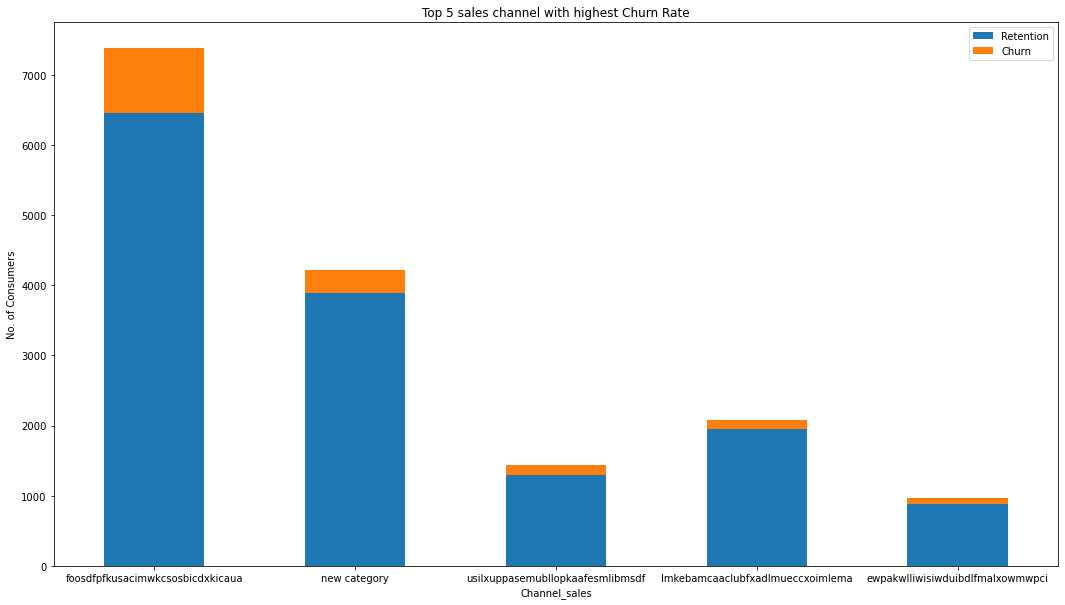

In [28]:
sales.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Top 5 sales channel with highest Churn Rate")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("Channel_sales")
plt.show()

In [29]:
gas = train[["has_gas",
               "churn","id"]].groupby(["has_gas",
                                         "churn"])["id"].count().unstack(level=1).sort_values(by=1,
                                                                                                ascending = False)
gas

churn,0,1
has_gas,,
f,11771,1361
t,2730,234


In [30]:
gas_percentage = gas.div(gas.sum(axis=1),axis=0)*100
gas_percentage

churn,0,1
has_gas,,
f,89.636004,10.363996
t,92.105263,7.894737


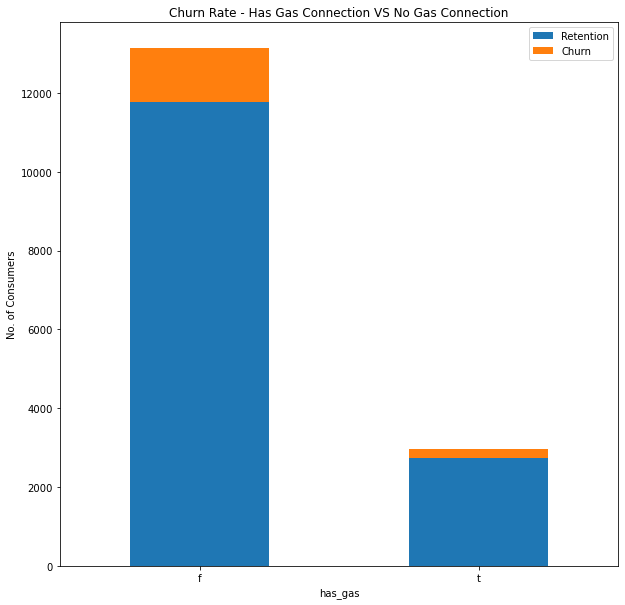

In [31]:
gas.plot(kind="bar",
 figsize=(10,10),
 stacked=True,
rot=0,
 title= "Churn Rate - Has Gas Connection VS No Gas Connection")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("has_gas")
plt.show()

In [32]:
nb = train[["nb_prod_act",
               "churn", "id"]].groupby([
    "nb_prod_act","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)[:5]
nb_percentage = (nb.div(nb.sum(axis=1), axis=0)*100)
nb_percentage

churn,0,1
nb_prod_act,,
1,89.697452,10.302548
2,91.617430,8.382570
3,90.017825,9.982175
4,91.176471,8.823529
5,91.891892,8.108108


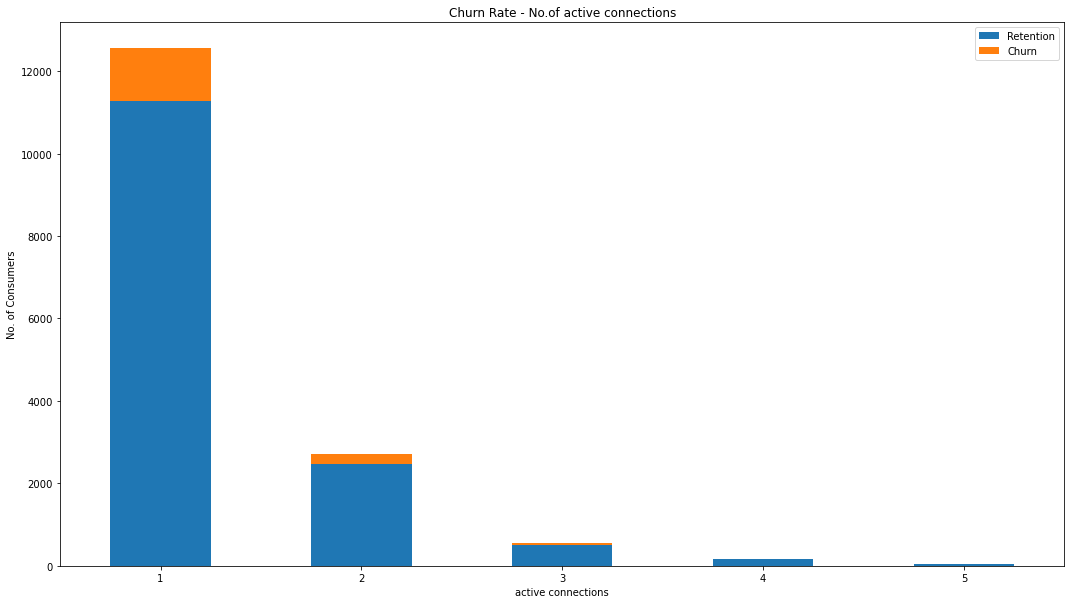

In [33]:
nb.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Churn Rate - No.of active connections")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("active connections")
plt.show()

In [34]:
antiquity = train[["num_years_antig",
               "churn", "id"]].groupby([
    "num_years_antig","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)[:10]
antiquity_percentage = (antiquity.div(antiquity.sum(axis=1), axis=0)*100)
antiquity_percentage

churn,0,1
num_years_antig,,
4,87.716463,12.283537
3,86.543344,13.456656
6,92.718639,7.281361
5,91.302605,8.697395
7,91.975309,8.024691
11,92.796610,7.203390
12,88.976378,11.023622
8,94.059406,5.940594
10,93.805310,6.194690


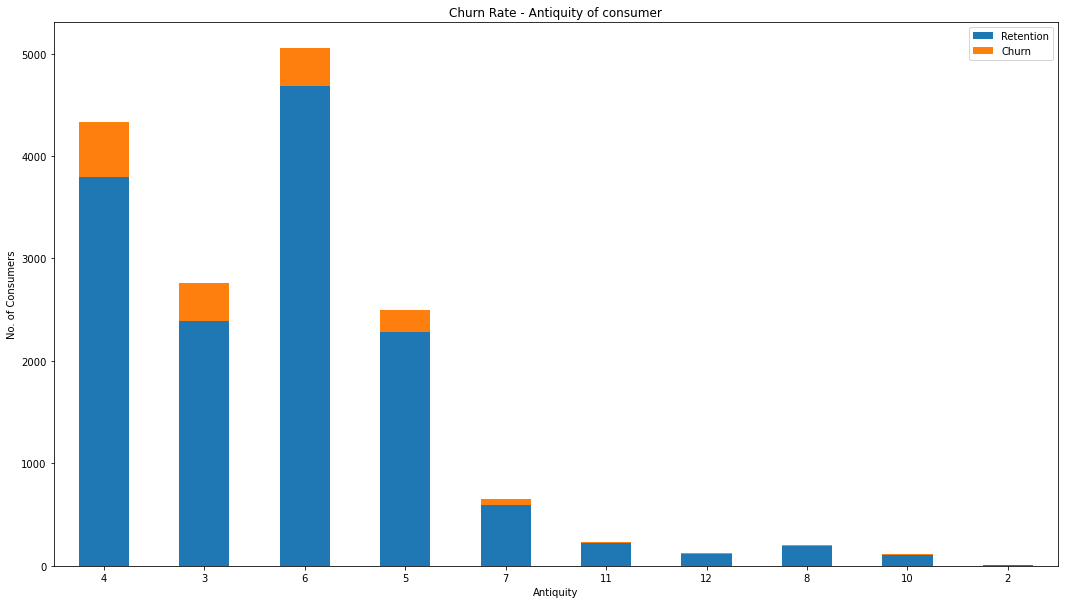

In [35]:
antiquity.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Churn Rate - Antiquity of consumer")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("Antiquity")
plt.show()

In [36]:
origin = train[["origin_up",
               "churn", "id"]].groupby([
    "origin_up","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
origin_percentage

churn,0,1
origin_up,,
lxidpiddsbxsbosboudacockeimpuepw,87.092652,12.907348
ldkssxwpmemidmecebumciepifcamkci,91.402838,8.597162
kamkkxfxxuwbdslkwifmmcsiusiuosws,94.133274,5.866726
ewxeelcelemmiwuafmddpobolfuxioce,100.000000,NaN
usapbepcfoloekilkwsdiboslwaxobdp,100.000000,NaN


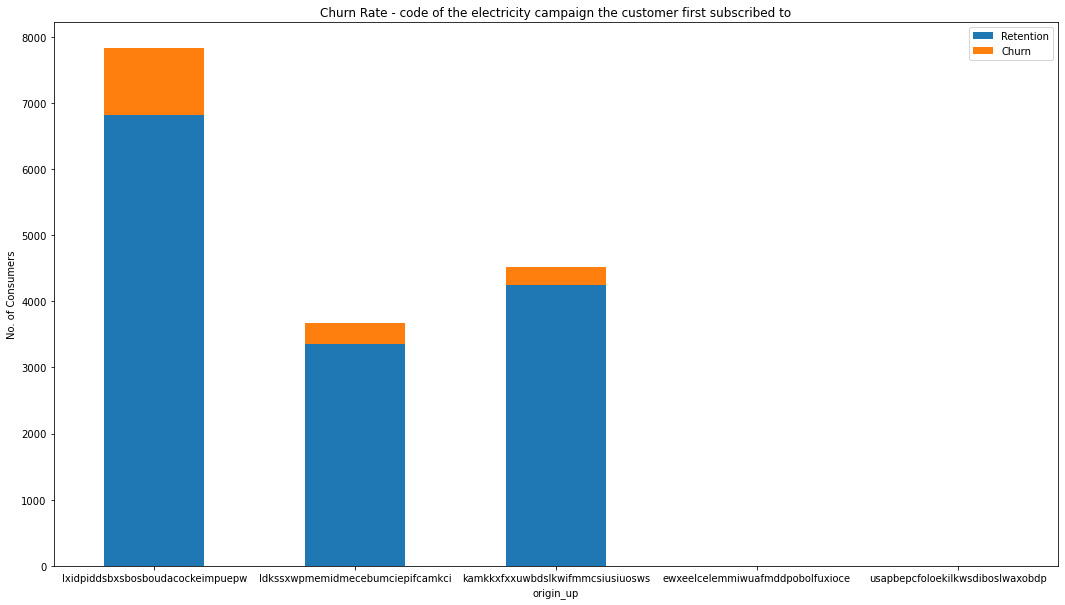

In [37]:
origin.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Churn Rate - code of the electricity campaign the customer first subscribed to")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("origin_up")
plt.show()

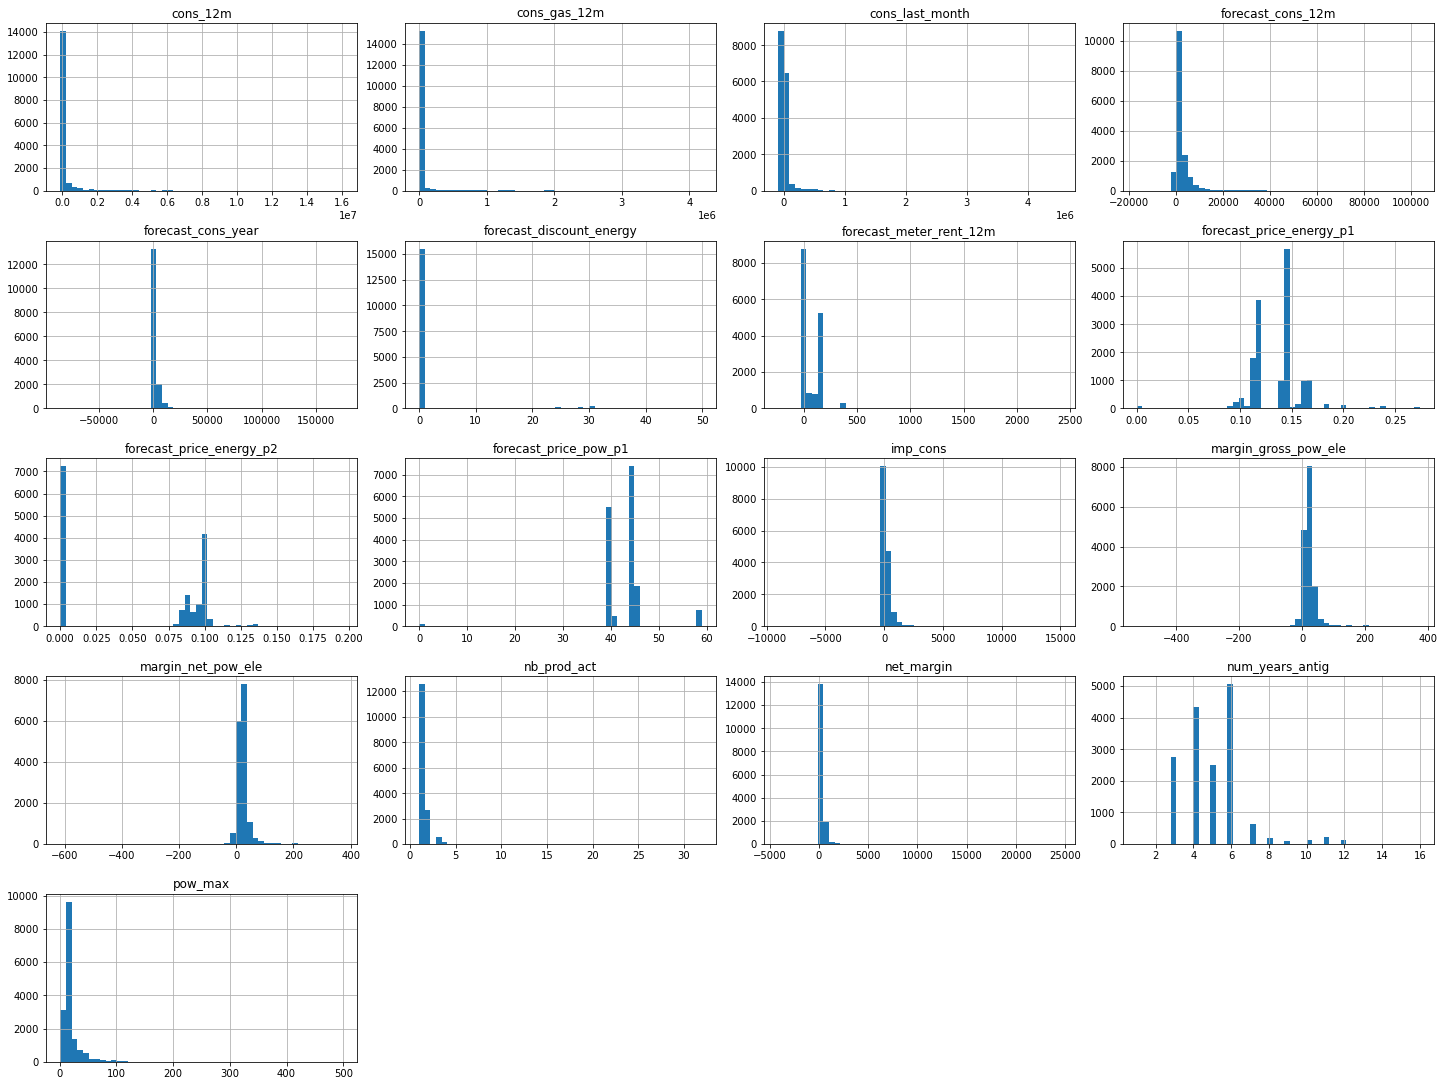

In [38]:
train_data_copy.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

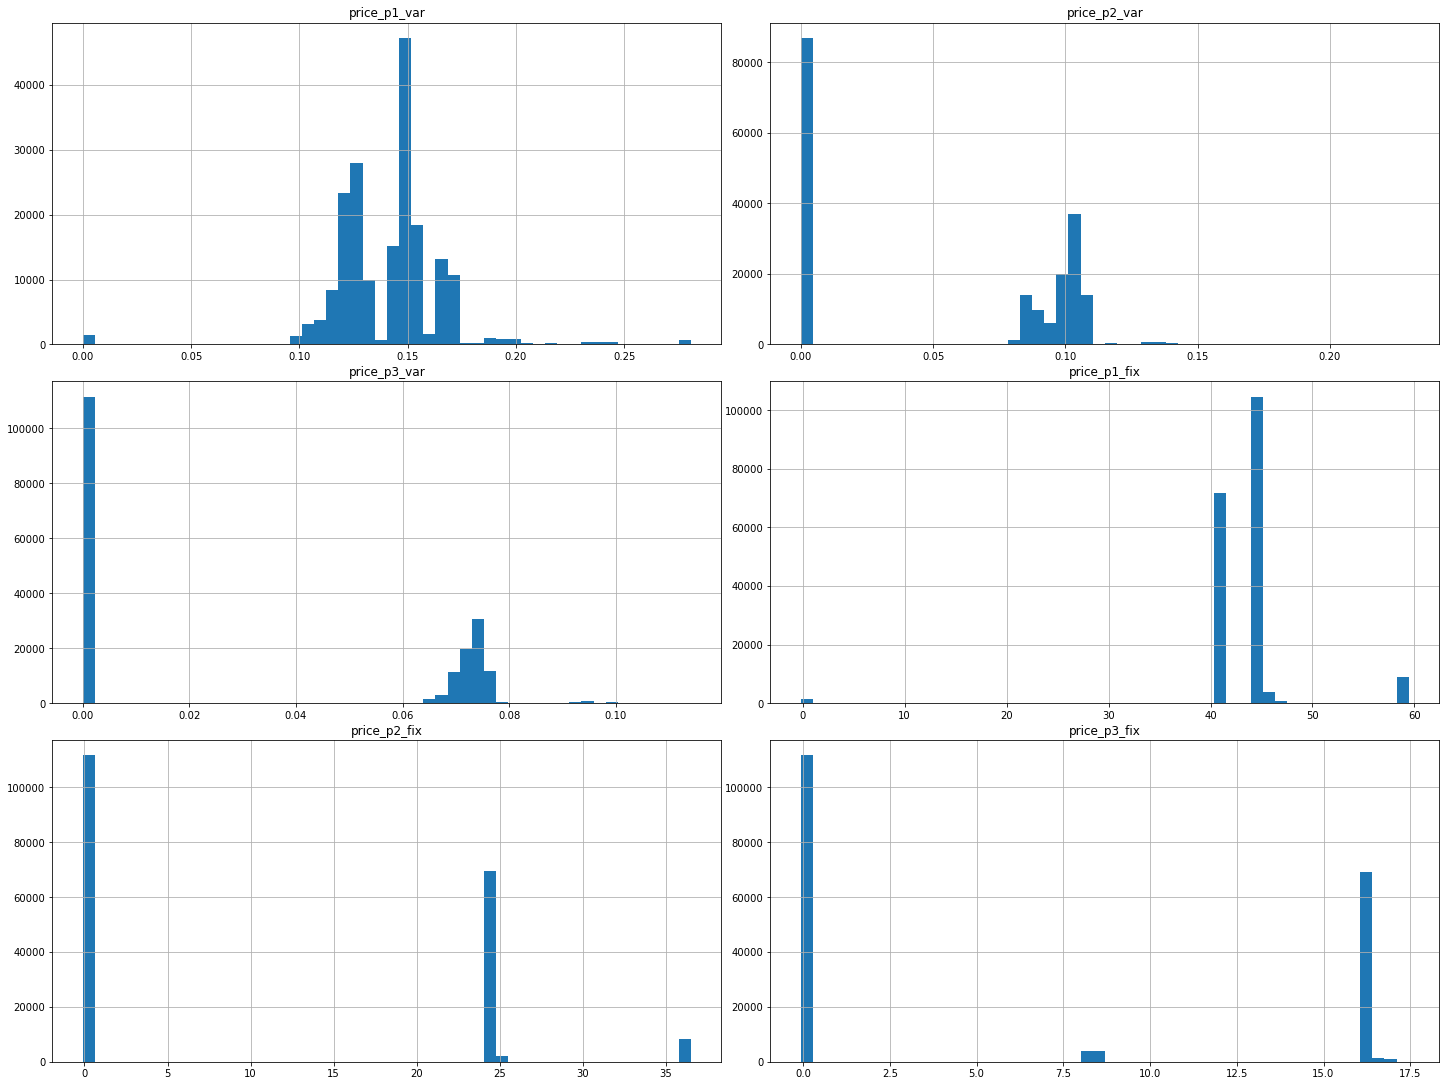

In [39]:
train_hist.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

In [40]:
for col in ['date_activ','date_end','date_modif_prod','date_renewal']:
    train[col]=pd.to_datetime(train[col])

In [41]:
train.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [42]:
train["tenure"] = train["date_end"]-train["date_activ"]
train["tenure"] = train["tenure"].apply(lambda x: x.days)
train["tenure"]

0        1460
1        1096
2        2566
3        2192
4        2192
         ... 
16091    1445
16092    1461
16093    1460
16094    1461
16095    2556
Name: tenure, Length: 16096, dtype: int64

In [43]:
train["tenure_year"] = train["tenure"].apply(lambda x: int(np.round(x/365)))
train["tenure_year"]

0        4
1        3
2        7
3        6
4        6
        ..
16091    4
16092    4
16093    4
16094    4
16095    7
Name: tenure_year, Length: 16096, dtype: int64

In [44]:
tenure = train[["tenure_year", "churn", "id"]].groupby(["tenure_year",
                                                                 "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
tenure_percentage

churn,0,1
tenure_year,,
1,100.000000,NaN
2,100.000000,NaN
3,85.702411,14.297589
4,87.172379,12.827621
5,89.428571,10.571429
6,92.407809,7.592191
7,92.394457,7.605543
8,93.188854,6.811146
9,95.698925,4.301075


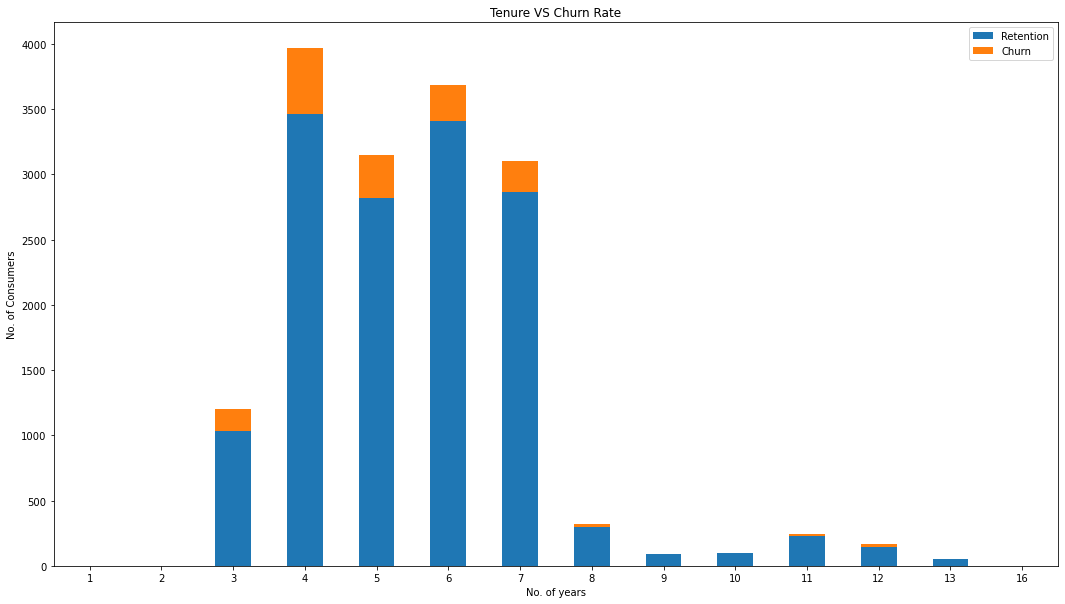

In [45]:
tenure.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Tenure VS Churn Rate")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()

We can clearly see that churn is very low for companies which joined recently or that have made the contract a long time ago. The higher number of churners are within the 3-7 years of tenure.

In [46]:
train['bill_dev']=(train['cons_12m']/12)-train['cons_last_month']
train["bill_dev"]

0        15747.916667
1            0.000000
2          388.333333
3           45.333333
4          132.000000
             ...     
16091     2689.166667
16092      420.916667
16093      -25.333333
16094       10.916667
16095      727.500000
Name: bill_dev, Length: 16096, dtype: float64

In [47]:
train["forecast_cons_12m"]

0        26520.30
1            0.00
2          189.95
3           47.96
4          240.04
           ...   
16091     4648.01
16092      631.69
16093      190.39
16094       19.34
16095      762.41
Name: forecast_cons_12m, Length: 16096, dtype: float64

In [48]:
train_hist.shape

(193002, 8)

In [49]:
train_hist.isnull().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [50]:
train_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [51]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")

In [52]:
train_hist[["price_p1_var","price_p2_var",
            "price_p3_var",
            "price_p1_fix","price_p2_fix",
            "price_p3_fix"]] = imp_mean.fit_transform(train_hist[["price_p1_var","price_p2_var",
                                                                    "price_p3_var","price_p1_fix",
                                                                   "price_p2_fix","price_p3_fix"]])

In [53]:
train_hist["price_p1"] = train_hist["price_p1_fix"]+train_hist["price_p1_var"]
train_hist["price_p2"] = train_hist["price_p2_fix"]+train_hist["price_p2_var"]
train_hist["price_p3"] = train_hist["price_p3_fix"]+train_hist["price_p3_var"]

In [54]:
train_hist.drop(['price_date','price_p1_var','price_p2_var','price_p3_var',
                'price_p1_fix','price_p2_fix','price_p3_fix'],inplace=True,axis=1)

In [55]:
train=pd.merge(train_hist, train, on=['id'])

In [56]:
train.fillna(0,inplace=True)

In [57]:
y = train["churn"]
X = train.drop(labels = ["id",'date_activ','date_end','date_modif_prod','date_renewal',"churn"],axis = 1)

In [58]:
X['has_gas']=X['has_gas'].apply(lambda x:0 if x=='f' else 1)

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   price_p1                  193002 non-null  float64
 1   price_p2                  193002 non-null  float64
 2   price_p3                  193002 non-null  float64
 3   channel_sales             193002 non-null  object 
 4   cons_12m                  193002 non-null  int64  
 5   cons_gas_12m              193002 non-null  int64  
 6   cons_last_month           193002 non-null  int64  
 7   forecast_cons_12m         193002 non-null  float64
 8   forecast_cons_year        193002 non-null  int64  
 9   forecast_discount_energy  193002 non-null  int32  
 10  forecast_meter_rent_12m   193002 non-null  float64
 11  forecast_price_energy_p1  193002 non-null  float64
 12  forecast_price_energy_p2  193002 non-null  float64
 13  forecast_price_pow_p1     193002 non-null  i

In [60]:
X.head()

,price_p1,price_p2,price_p3,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,tenure,tenure_year,bill_dev
0,44.418298,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,531.5,630,0,...,21,21,1,52,3,ldkssxwpmemidmecebumciepifcamkci,13,1096,3,-332.0
1,44.418298,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,531.5,630,0,...,21,21,1,52,3,ldkssxwpmemidmecebumciepifcamkci,13,1096,3,-332.0
2,44.418298,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,531.5,630,0,...,21,21,1,52,3,ldkssxwpmemidmecebumciepifcamkci,13,1096,3,-332.0
3,44.416557,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,531.5,630,0,...,21,21,1,52,3,ldkssxwpmemidmecebumciepifcamkci,13,1096,3,-332.0
4,44.416557,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,531.5,630,0,...,21,21,1,52,3,ldkssxwpmemidmecebumciepifcamkci,13,1096,3,-332.0


In [61]:
X=pd.get_dummies(X,["channel_sales","origin_up"],drop_first=True)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 36 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   price_p1                                        193002 non-null  float64
 1   price_p2                                        193002 non-null  float64
 2   price_p3                                        193002 non-null  float64
 3   cons_12m                                        193002 non-null  int64  
 4   cons_gas_12m                                    193002 non-null  int64  
 5   cons_last_month                                 193002 non-null  int64  
 6   forecast_cons_12m                               193002 non-null  float64
 7   forecast_cons_year                              193002 non-null  int64  
 8   forecast_discount_energy                        193002 non-null  int32  
 9   forecast_meter_rent_12m   

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [65]:
np.any(np.isnan(X_train))

False

In [66]:
np.all(np.isfinite(X_train))

True

In [70]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [71]:
model = XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=500,n_jobs=-1,use_label_encoder=False)
result = model.fit(X_train,y_train)

In [77]:
from sklearn import metrics

In [75]:
def evaluate(model_, X_test_, y_test_):
    prediction_test_ = model_.predict(X_test_)

    results = pd.DataFrame({"Accuracy" : [metrics.accuracy_score(y_test_, prediction_test_)],
    "Precision" : [metrics.precision_score(y_test_, prediction_test_)],
    "Recall" : [metrics.recall_score(y_test_, prediction_test_)]})
    return results

In [78]:
evaluate(model, X_test, y_test)

,Accuracy,Precision,Recall
0,0.977738,1.0,0.775904
